# <span style="color:#5ce1e6">**cluster<span style="color:#ff66c4">matic</span>**</span>

`clustermatic` is a Python library designed to accelerate <span style="color:#ff66c4">**clustering**</span> tasks using `scikit-learn`. It serves for selecting the optimal clustering algorithm and its hyperparameters, providing visualizations and metrics for comparison.

### Features:

- **Clustering Algorithms**: Analyzes six clustering algorithms from `scikit-learn`:
    - `KMeans`
    - `DBSCAN`
    - `MiniBatchKMeans`
    - `AgglomerativeClustering`
    - `OPTICS`
    - `SpectralClustering`
- **Optimization Methods**: Includes Bayesian optimization and random search for hyperparameter tuning.
- **Flexible Preprocessing**: Allows users to customize how the data is meant to be preprocessed, adjusting methods such as scaling, normalization, and dimensionality reduction.
- **Evaluation Metrics**: Supports evaluation with `silhouette`, `calinski_harabasz`, and `davies_bouldin` scores.
- **Report Generation**: Generates reports in HTML format after optimization.


The <span style="color:#5ce1e6">**target <span style="color:#ff66c4">audience</span>**</span> for this AutoML library for clustering tasks includes all machine learning practitioners seeking to streamline the process of clustering their datasets without delving into the complexities of algorithm selection, hyperparameter tuning, or model evaluation by themselves.

### <span style="color:#5ce1e6">**Similar <span style="color:#ff66c4">libraries</span>**</span>

In fact, popular AutoML libraries mostly focus on supervised ML methods, whereas unsupervised learning is often overlooked (what was the main motivation behind focusing on clustering while creating AutoML library). With this being said, here are other libraries providing functionalities that allow more or less for assessment of models for clustering tasks (not necessarily inherently for AutoML)

- `hypercluster`
- `Optuna`
- `PyCaret`


Due to the package versioning conflicts, their review is separated in another notebook, `existing_libraries_review.ipynb`


# <span style="color:#5ce1e6">**cluster<span style="color:#ff66c4">matic</span>**</span> walkthrough

Full code is available under [**this link**](https://github.com/AKapich/clustermatic/tree/main). [`AutoClusterizer`](https://github.com/AKapich/clustermatic/blob/main/clustermatic/auto_clusterizer.py) class is the main part of the library & combines all the features.
Throughout the notebook, whenever some feature embedded within `AutoClusterizer` will be mentioned, there will be a link to the corresponding file.

In [1]:
from clustermatic import AutoClusterizer

Let's get some sample data

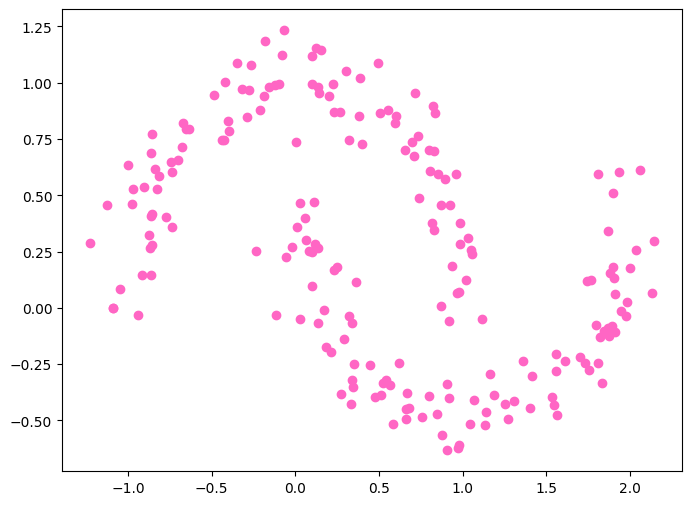

In [2]:
from sklearn.datasets import make_moons
import matplotlib.pyplot as plt

X, _ = make_moons(n_samples=200, noise=0.1, random_state=42)

plt.figure(figsize=(8, 6))
plt.scatter(X[:, 0], X[:, 1], c="#ff66c4")
plt.show()

# <span style="color:#5ce1e6">**Basic <span style="color:#ff66c4">workflow</span>**</span>

[`AutoClusterizer`](https://github.com/AKapich/clustermatic/blob/main/clustermatic/auto_clusterizer.py) object offers multiple parameters to customize the clustering process.

- **optimization_method**: The method used for optimization. Default is `bayes`.
- **n_iterations**: The number of iterations for the optimization process. Default is 30.
- **score_metric**: The metric used to evaluate the clustering performance. Default is `silhouette`.
- **numerical_impute_strategy**: The strategy for imputing missing numerical values. Default is `mean`.
- **categorical_impute_strategy**: The strategy for imputing missing categorical values. Default is `constant` equal to `-`.
- **numerical_scaling_strategy**: The strategy for scaling numerical features. Default is `standard`.
- **categorical_encoding_strategy**: The strategy for encoding categorical features. Default is `onehot`.
- **reduce_dim**: Whether to reduce dimensionality of the data. Default is `False`.
- **exclude_algorithms**: List of algorithms to exclude from the clustering process. Default is an empty list.
- **seed**: The seed for optimization, default is `None`


At first, let's explore an example of basic workflow with default parameters

In [3]:
ac = AutoClusterizer(seed=42)

Method `fit` is used to fit the clustering algorithms to the data. It saves the best models for each algorithm along with summary statistics as `AutoClusterizer`'s attributes. Logs track optimization time and the best score for each algorithm, with the all the optimization performed by [`Optimizer`](https://github.com/AKapich/clustermatic/blob/main/clustermatic/optimization.py) class. 

In case of small datasets, the hyperparameter search space is dynamically adjusted to omit issues such as too many clusters taken into account.

In [5]:
ac.fit(X)

Optimizing KMeans
KMeans optimized in 10.99 seconds. Best score: 0.48774756181034495
Optimizing DBSCAN
DBSCAN optimized in 7.23 seconds. Best score: 0.3732212378149704
Optimizing MiniBatchKMeans
MiniBatchKMeans optimized in 11.40 seconds. Best score: 0.4880950094280873
Optimizing AgglomerativeClustering
AgglomerativeClustering optimized in 7.12 seconds. Best score: 0.4714826978908967
Optimizing OPTICS
OPTICS optimized in 14.78 seconds. Best score: 0.43470331630441306
Optimizing SpectralClustering
SpectralClustering optimized in 11.11 seconds. Best score: 0.487505480831052


After fitting, report in the `pd.DataFrame` format with optimization results can be easily accessed. It's sorted by the score metric.

In [6]:
ac.report

,Algorithm,Metric,Best Score,Best Params,Train Time
0,MiniBatchKMeans,silhouette,0.488095,"{'n_clusters': 2, 'init': 'k-means++', 'n_init...",11.401237
1,KMeans,silhouette,0.487748,"{'n_clusters': 2, 'init': 'random', 'n_init': ...",10.988870
2,SpectralClustering,silhouette,0.487505,"{'n_clusters': 2, 'eigen_solver': 'amg', 'affi...",11.112877
3,AgglomerativeClustering,silhouette,0.471483,"{'n_clusters': 2, 'metric': 'cosine', 'linkage...",7.123637
4,OPTICS,silhouette,0.434703,"{'min_samples': 14, 'xi': 0.11027048346863755,...",14.778988
5,DBSCAN,silhouette,0.373221,"{'eps': 0.39447498580759566, 'min_samples': 2,...",7.228696


Moreover, for each algorithm the best model is stored.

In [7]:
ac.best_models

{'KMeans': KMeans(init='random', n_clusters=2, n_init=16, tol=0.0005899741796710488),
 'DBSCAN': DBSCAN(eps=0.39447498580759566, min_samples=2),
 'MiniBatchKMeans': MiniBatchKMeans(batch_size=37, max_iter=293, n_clusters=2, n_init=16,
                 tol=0.0024618845055579515),
 'AgglomerativeClustering': AgglomerativeClustering(linkage='complete', metric='cosine'),
 'OPTICS': OPTICS(min_cluster_size=0.2769991463742093, min_samples=14,
        xi=0.11027048346863755),
 'SpectralClustering': SpectralClustering(assign_labels='discretize', eigen_solver='amg', n_clusters=2)}

In [8]:
ac.best_models["MiniBatchKMeans"]

MiniBatchKMeans(batch_size=37, max_iter=293, n_clusters=2, n_init=16,
                tol=0.0024618845055579515)

The best model can be directly accessed through `best_model` attribute. It's saved with `.pkl` extension in the `clustermatic_models` folder created in current working directory.

In [9]:
ac.best_model

MiniBatchKMeans(batch_size=37, max_iter=293, n_clusters=2, n_init=16,
                tol=0.0024618845055579515)

With `evaluate` method, plots for monitoring the optimization process and final clustering with the best model can be obtained. All of them along with the aforementioned report are saved in `HTML` format, within `clustermatic_report` folder in the current working directory. [`Evaluator`](https://github.com/AKapich/clustermatic/blob/main/clustermatic/evaluation.py) object is used to generate plots and reports.

Sometimes, some algorithms may be unable to correctly divide data into clusters (e.g. yield only one cluster). In such cases, they are omitted on the plots and the scores are set to reflect this. (Accordingly -1 for silhouette score, 0 for Calinski-Harabasz score & 99999 for Davies-Bouldin score)

                 Algorithm      Metric  Best Score  \
0          MiniBatchKMeans  silhouette    0.488095   
1                   KMeans  silhouette    0.487748   
2       SpectralClustering  silhouette    0.487505   
3  AgglomerativeClustering  silhouette    0.471483   
4                   OPTICS  silhouette    0.434703   
5                   DBSCAN  silhouette    0.373221   

                                         Best Params  Train Time  
0  {'n_clusters': 2, 'init': 'k-means++', 'n_init...   11.401237  
1  {'n_clusters': 2, 'init': 'random', 'n_init': ...   10.988870  
2  {'n_clusters': 2, 'eigen_solver': 'amg', 'affi...   11.112877  
3  {'n_clusters': 2, 'metric': 'cosine', 'linkage...    7.123637  
4  {'min_samples': 14, 'xi': 0.11027048346863755,...   14.778988  
5  {'eps': 0.39447498580759566, 'min_samples': 2,...    7.228696  


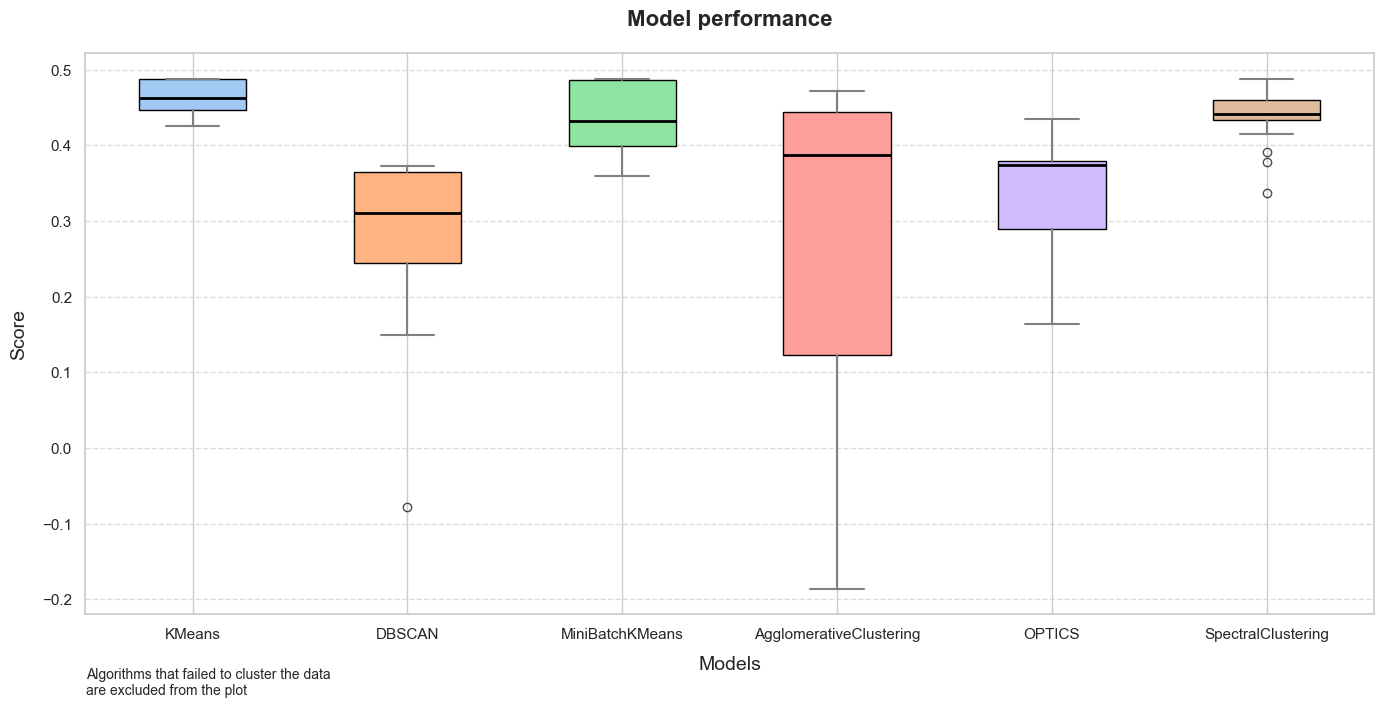

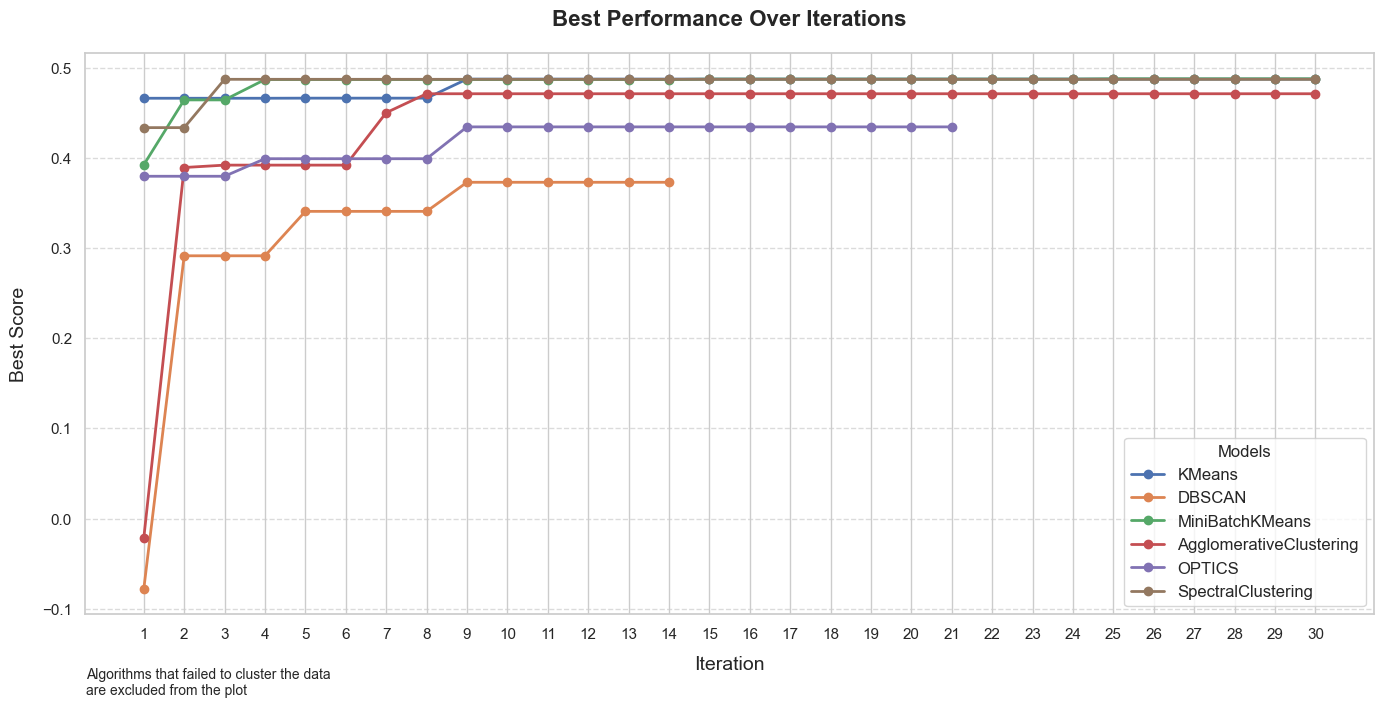

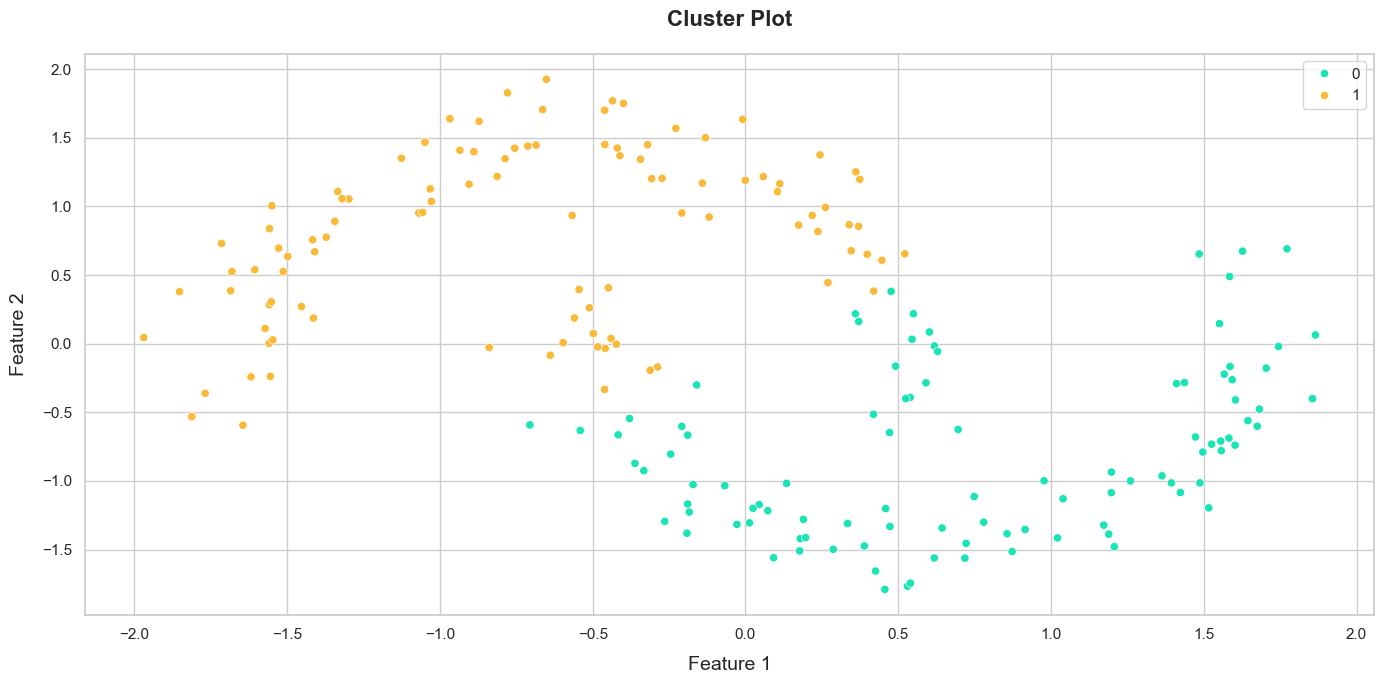

In [10]:
ac.evaluate()

Cluster labels can be directly obtained with the `cluster` method. Its usage requires fitting `AutoClusterizer` first. <br> `fit_cluster` method combines `fit` and `cluster` methods in one call.

In [11]:
labels = ac.cluster(X)
labels

array([0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0,
       1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0,
       1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0,
       0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0,
       1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1,
       1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0,
       0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1,
       1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1,
       1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0,
       1, 0])

In [12]:
labels2 = ac.fit_cluster(X)
labels2

Optimizing KMeans
KMeans optimized in 13.90 seconds. Best score: 0.48774756181034495
Optimizing DBSCAN
DBSCAN optimized in 14.41 seconds. Best score: 0.3732212378149704
Optimizing MiniBatchKMeans
MiniBatchKMeans optimized in 19.04 seconds. Best score: 0.4880950094280873
Optimizing AgglomerativeClustering
AgglomerativeClustering optimized in 11.27 seconds. Best score: 0.4714826978908967
Optimizing OPTICS
OPTICS optimized in 16.66 seconds. Best score: 0.43470331630441306
Optimizing SpectralClustering
SpectralClustering optimized in 14.73 seconds. Best score: 0.487505480831052


array([0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0,
       1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0,
       1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0,
       0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0,
       1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1,
       1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0,
       0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1,
       1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1,
       1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0,
       1, 0])

# <span style="color:#5ce1e6">**Clustering <span style="color:#ff66c4">customization</span>**</span>

`AutoClusterizer` allows to change optimization method, number of iterations in the optimization process and how the data is meant to be preprocessed.

### <span style="color:#5ce1e6">**Optimization <span style="color:#ff66c4">method</span>**</span>

There are two optimization methods available: `bayes` and `random`, with `bayes` being the default one. What's relevant they're **not** `BayesSearchCV` from `scikit-optimize` and `RandomizedSearchCV` from `scikit-learn`, since crossvalidation is redundant in our case of clusterization tasks. Instead, custom [`BayesSearch`](https://github.com/AKapich/clustermatic/blob/main/clustermatic/bayes_search.py) & [`RandomizedSearch`](https://github.com/AKapich/clustermatic/blob/main/clustermatic/random_search.py) classes are used.

In [13]:
ac2 = AutoClusterizer(optimization_method="random", seed=42)
ac2.fit(X)

Optimizing KMeans
KMeans optimized in 4.71 seconds. Best score: 0.4689019528652861
Optimizing DBSCAN
DBSCAN optimized in 0.16 seconds. Best score: -1
Optimizing MiniBatchKMeans
MiniBatchKMeans optimized in 5.08 seconds. Best score: 0.4568448994675528
Optimizing AgglomerativeClustering
AgglomerativeClustering optimized in 0.13 seconds. Best score: 0.4298841916048923
Optimizing OPTICS
OPTICS optimized in 9.49 seconds. Best score: 0.2596737950785548
Optimizing SpectralClustering
SpectralClustering optimized in 4.70 seconds. Best score: 0.44048367164399765


### <span style="color:#5ce1e6">**Scoring <span style="color:#ff66c4">metric</span>**</span>

The metric used to evaluate the clustering performance can be changed with the `score_metric` parameter. The default is `silhouette`, but `calinski_harabasz` and `davies_bouldin` are also available, in the same form known from `scikit-learn`. (The corresponding file is [here](https://github.com/AKapich/clustermatic/blob/main/clustermatic/scoring.py)).

What's relevant, all these 3 metrics have different interpretation:
- `silhouette` - ranges from -1 to 1, the higher the better
- `calinski_harabasz` - ranges from 0 to infinity, the higher the better
- `davies_bouldin` - ranges from 0 to infinity, the lower the better

Especially `davies_bouldin` works reversely to the other two, with lower values being desired ones. `evaluate` method plots are adjusted to the chosen metric accordingly.

In [14]:
ac3 = AutoClusterizer(score_metric="davies_bouldin", seed=42)
ac3.fit(X)

Optimizing KMeans
KMeans optimized in 9.43 seconds. Best score: 0.6420035250852639
Optimizing DBSCAN
DBSCAN optimized in 6.96 seconds. Best score: 0.7987635733383232
Optimizing MiniBatchKMeans
MiniBatchKMeans optimized in 17.39 seconds. Best score: 0.6349847037514661
Optimizing AgglomerativeClustering
AgglomerativeClustering optimized in 6.17 seconds. Best score: 0.606652998641539
Optimizing OPTICS
OPTICS optimized in 14.56 seconds. Best score: 0.8642811301363006
Optimizing SpectralClustering
SpectralClustering optimized in 11.32 seconds. Best score: 0.6292088021642388


                 Algorithm          Metric  Best Score  \
0  AgglomerativeClustering  davies_bouldin    0.606653   
1       SpectralClustering  davies_bouldin    0.629209   
2          MiniBatchKMeans  davies_bouldin    0.634985   
3                   KMeans  davies_bouldin    0.642004   
4                   DBSCAN  davies_bouldin    0.798764   
5                   OPTICS  davies_bouldin    0.864281   

                                         Best Params  Train Time  
0  {'n_clusters': 9, 'metric': 'l1', 'linkage': '...    6.170214  
1  {'n_clusters': 10, 'eigen_solver': 'lobpcg', '...   11.320292  
2  {'n_clusters': 10, 'init': 'k-means++', 'n_ini...   17.388723  
3  {'n_clusters': 10, 'init': 'random', 'n_init':...    9.432894  
4  {'eps': 0.6664147178849273, 'min_samples': 20,...    6.964200  
5  {'min_samples': 2, 'xi': 0.1251045500148091, '...   14.560712  


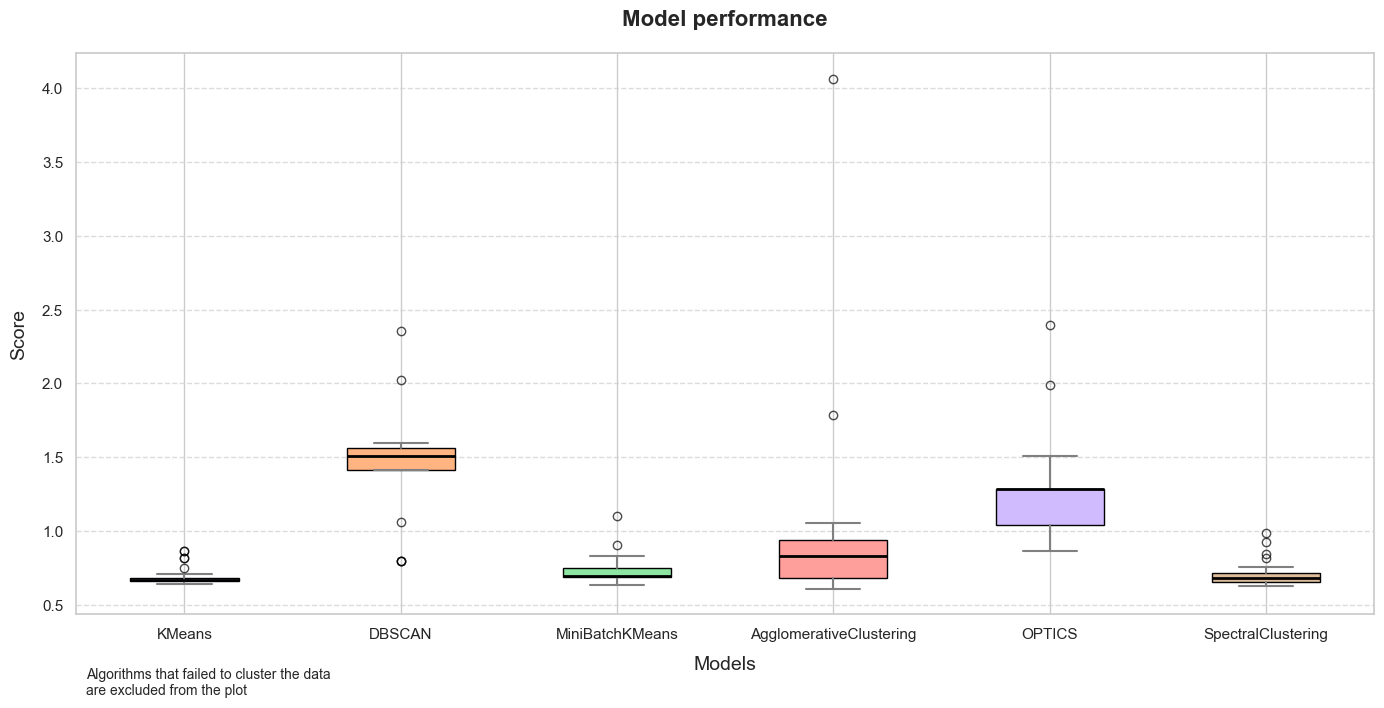

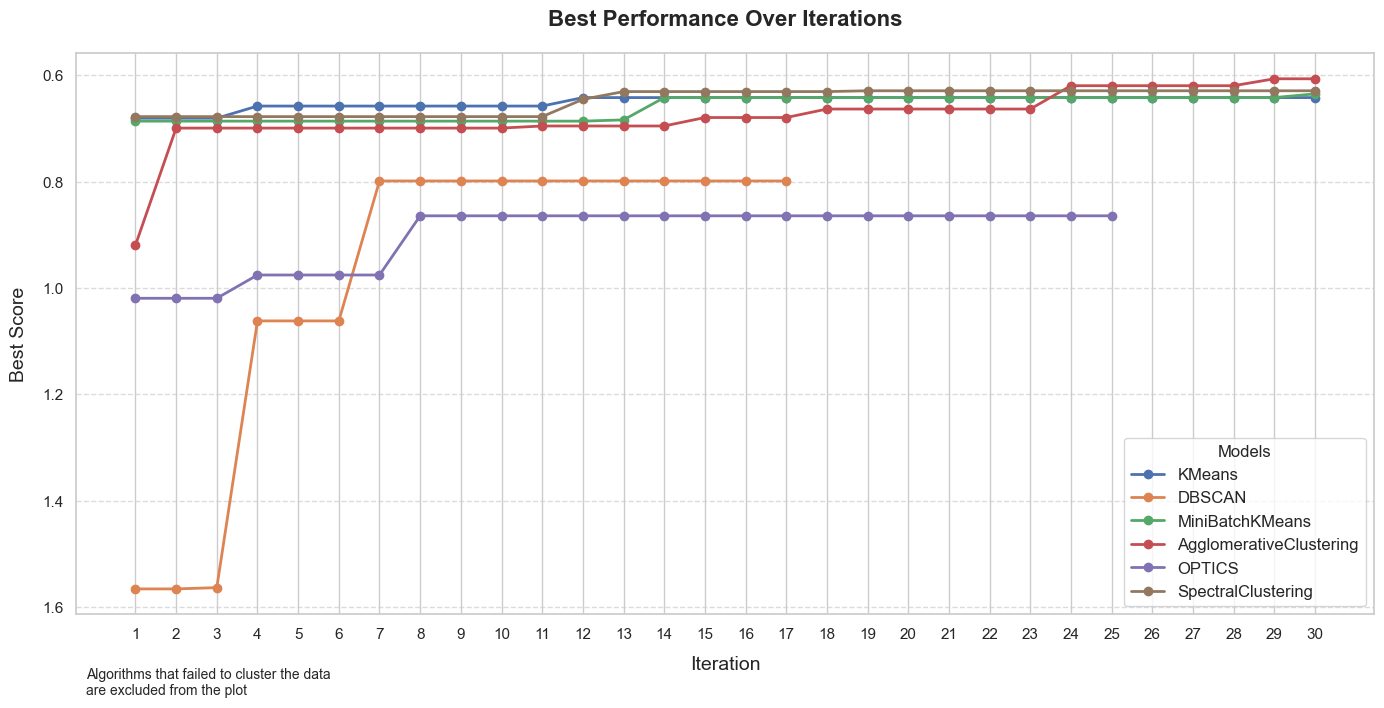

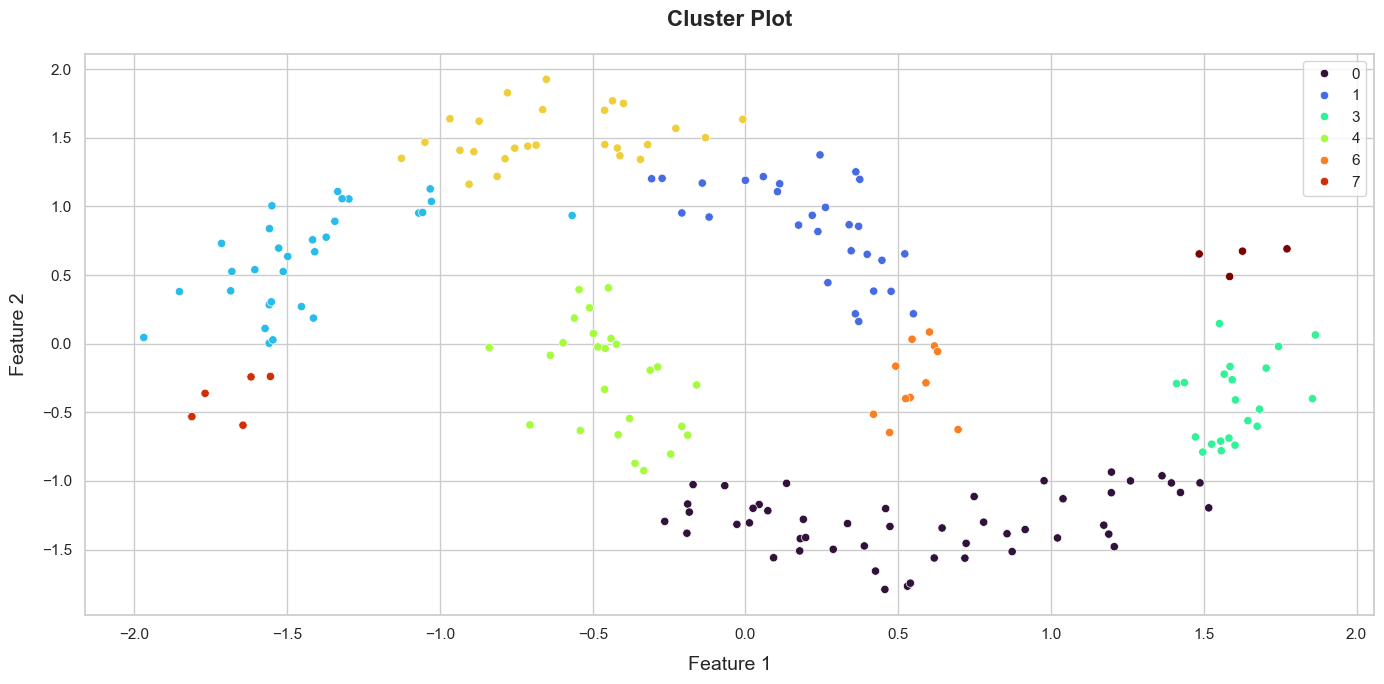

In [15]:
ac3.evaluate()

As proved above, choosing different metric may lead to different results.

### <span style="color:#5ce1e6">**Preprocessing <span style="color:#ff66c4">parameters</span>**</span>

The pipeline used to preprocess the data can be customized too. [`Preprocessor`](https://github.com/AKapich/clustermatic/blob/main/clustermatic/preprocessing.py) class is responsible for this.

- **numerical_impute_strategy**: The strategy for imputing missing numerical values, supports the same values as `SimpleImputer` from `scikit-learn`. Default is "mean".
- **categorical_impute_strategy**: The strategy for imputing missing categorical values, supports the same values as `SimpleImputer` from `scikit-learn`. Default is `constant` with `-` set as the filler value.
- **numerical_scaling_strategy**: The strategy for scaling numerical features, supports values `standard` and `minmax`, which correspond to `StandardScaler` and `MinMaxScaler` from `scikit-learn`. Default is "standard".
- **categorical_encoding_strategy**: The strategy for encoding categorical features, supports values `onehot` and `ordinal`, which correspond to `OneHotEncoder` and `OrdinalEncoder` from `scikit-learn`. Default is "onehot".
- **reduce_dim**: Whether to reduce dimensionality of the data with `PCA`. Default is False.

Let's create a custom `AutoClusterizer` object with different parameters.

In [16]:
ac4 = AutoClusterizer(
    numerical_impute_strategy="median",
    categorical_impute_strategy="most_frequent",
    numerical_scaling_strategy="minmax",
    categorical_encoding_strategy="onehot",
    seed=42,
)
ac4.fit(X)

Optimizing KMeans
KMeans optimized in 8.69 seconds. Best score: 0.48911299598784835
Optimizing DBSCAN
DBSCAN optimized in 6.10 seconds. Best score: 0.3757379941449442
Optimizing MiniBatchKMeans
MiniBatchKMeans optimized in 11.10 seconds. Best score: 0.48915560892147214
Optimizing AgglomerativeClustering
AgglomerativeClustering optimized in 6.76 seconds. Best score: 0.479013973444567
Optimizing OPTICS
OPTICS optimized in 14.14 seconds. Best score: 0.43618121733858883
Optimizing SpectralClustering
SpectralClustering optimized in 10.31 seconds. Best score: 0.48858556779163304


                 Algorithm      Metric  Best Score  \
0          MiniBatchKMeans  silhouette    0.489156   
1                   KMeans  silhouette    0.489113   
2       SpectralClustering  silhouette    0.488586   
3  AgglomerativeClustering  silhouette    0.479014   
4                   OPTICS  silhouette    0.436181   
5                   DBSCAN  silhouette    0.375738   

                                         Best Params  Train Time  
0  {'n_clusters': 2, 'init': 'k-means++', 'n_init...   11.104529  
1  {'n_clusters': 2, 'init': 'random', 'n_init': ...    8.693714  
2  {'n_clusters': 2, 'eigen_solver': 'amg', 'affi...   10.313654  
3  {'n_clusters': 2, 'metric': 'cosine', 'linkage...    6.756667  
4  {'min_samples': 14, 'xi': 0.15838965344413852,...   14.144501  
5  {'eps': 0.12604054621032382, 'min_samples': 2,...    6.102930  


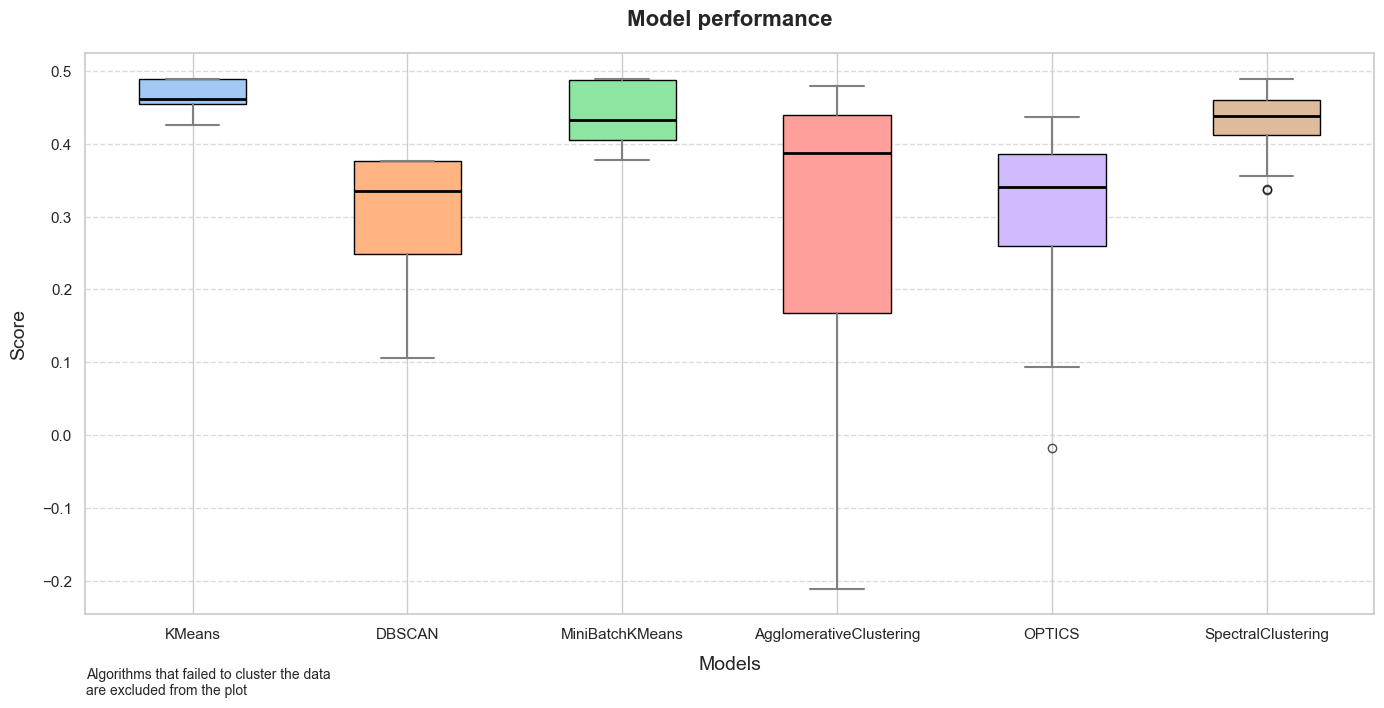

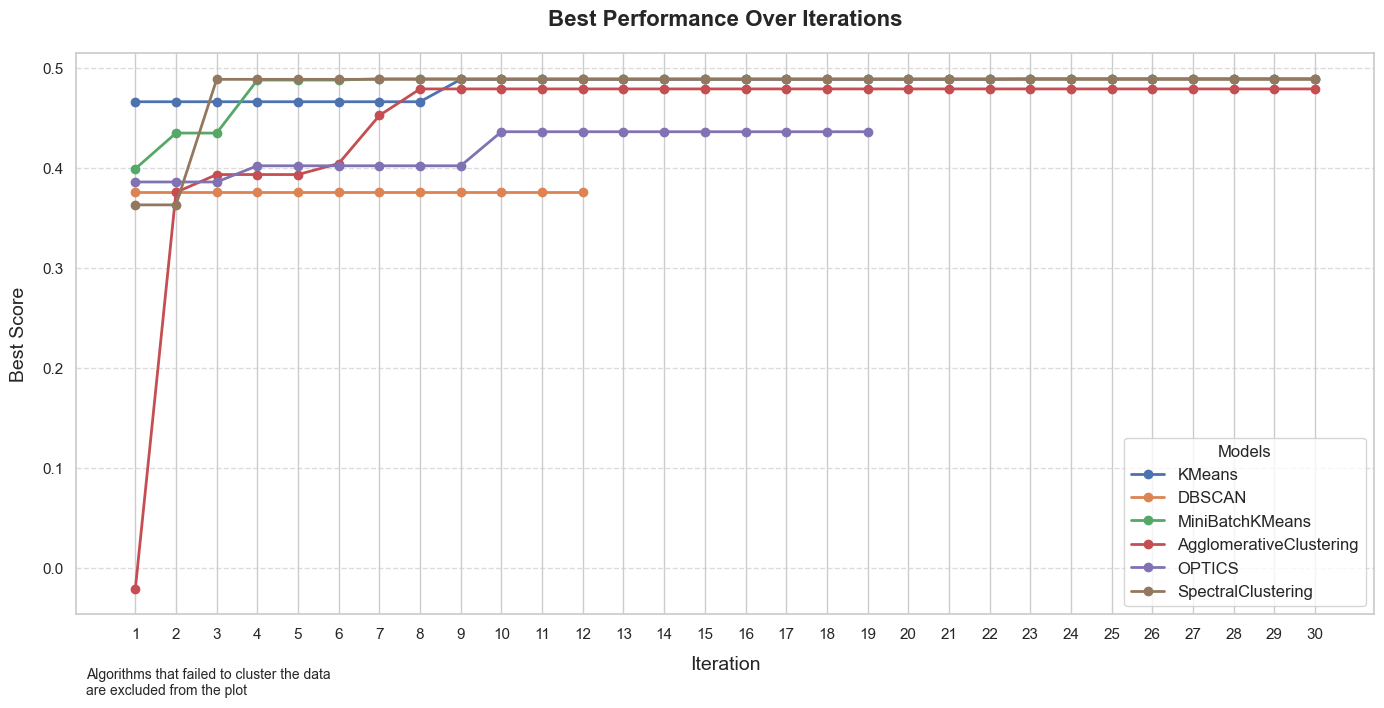

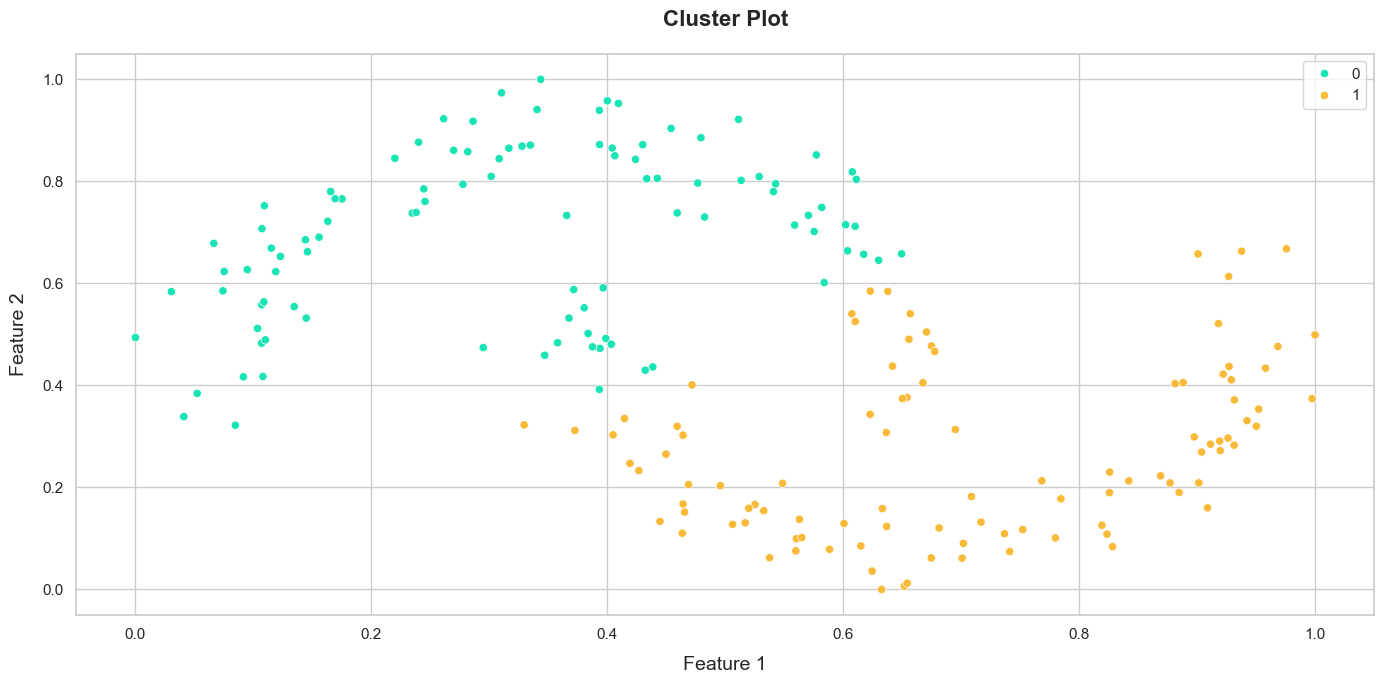

In [17]:
ac4.evaluate()

### <span style="color:#5ce1e6">**Other <span style="color:#ff66c4">parameters</span>**</span>

Moreover, we can also adjust amount of iterations in the optimization process with the `n_iterations` parameter and skip some algorithms with the `exclude_algorithms` parameter. <br>

`exclude_algorithms` needs to be passed as a list of strings with the names of the algorithms to be omitted. The available options are: `KMeans`, `DBSCAN`, `MiniBatchKMeans`, `AgglomerativeClustering`, `OPTICS`, and `SpectralClustering`.

In [18]:
ac5 = AutoClusterizer(n_iterations=20, exclude_algorithms=["DBSCAN", "OPTICS"], seed=42)
ac5.fit(X)

Optimizing KMeans
KMeans optimized in 4.62 seconds. Best score: 0.48774756181034495
Optimizing MiniBatchKMeans
MiniBatchKMeans optimized in 7.30 seconds. Best score: 0.4880950094280873
Optimizing AgglomerativeClustering
AgglomerativeClustering optimized in 3.00 seconds. Best score: 0.4714826978908967
Optimizing SpectralClustering
SpectralClustering optimized in 5.33 seconds. Best score: 0.487505480831052


                 Algorithm      Metric  Best Score  \
0          MiniBatchKMeans  silhouette    0.488095   
1                   KMeans  silhouette    0.487748   
2       SpectralClustering  silhouette    0.487505   
3  AgglomerativeClustering  silhouette    0.471483   

                                         Best Params  Train Time  
0  {'n_clusters': 2, 'init': 'k-means++', 'n_init...    7.299676  
1  {'n_clusters': 2, 'init': 'random', 'n_init': ...    4.624858  
2  {'n_clusters': 2, 'eigen_solver': 'amg', 'affi...    5.333280  
3  {'n_clusters': 2, 'metric': 'cosine', 'linkage...    3.004078  


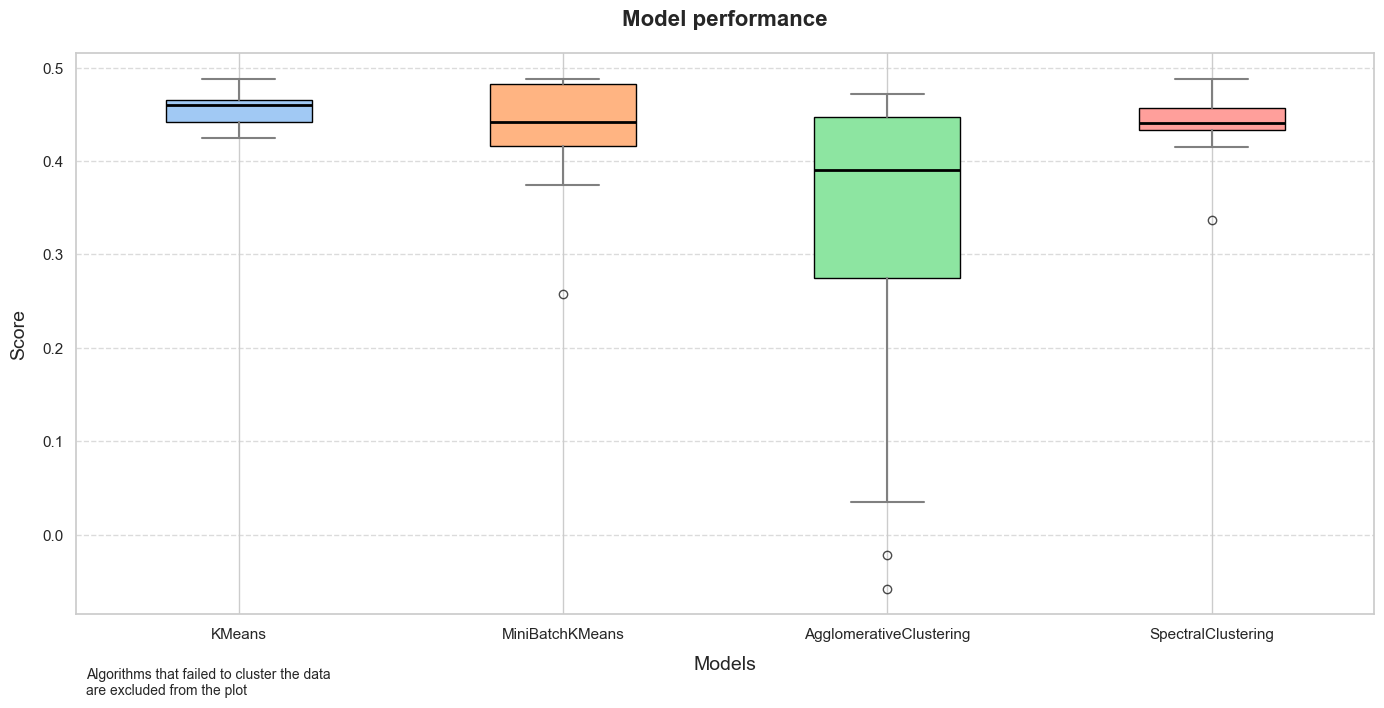

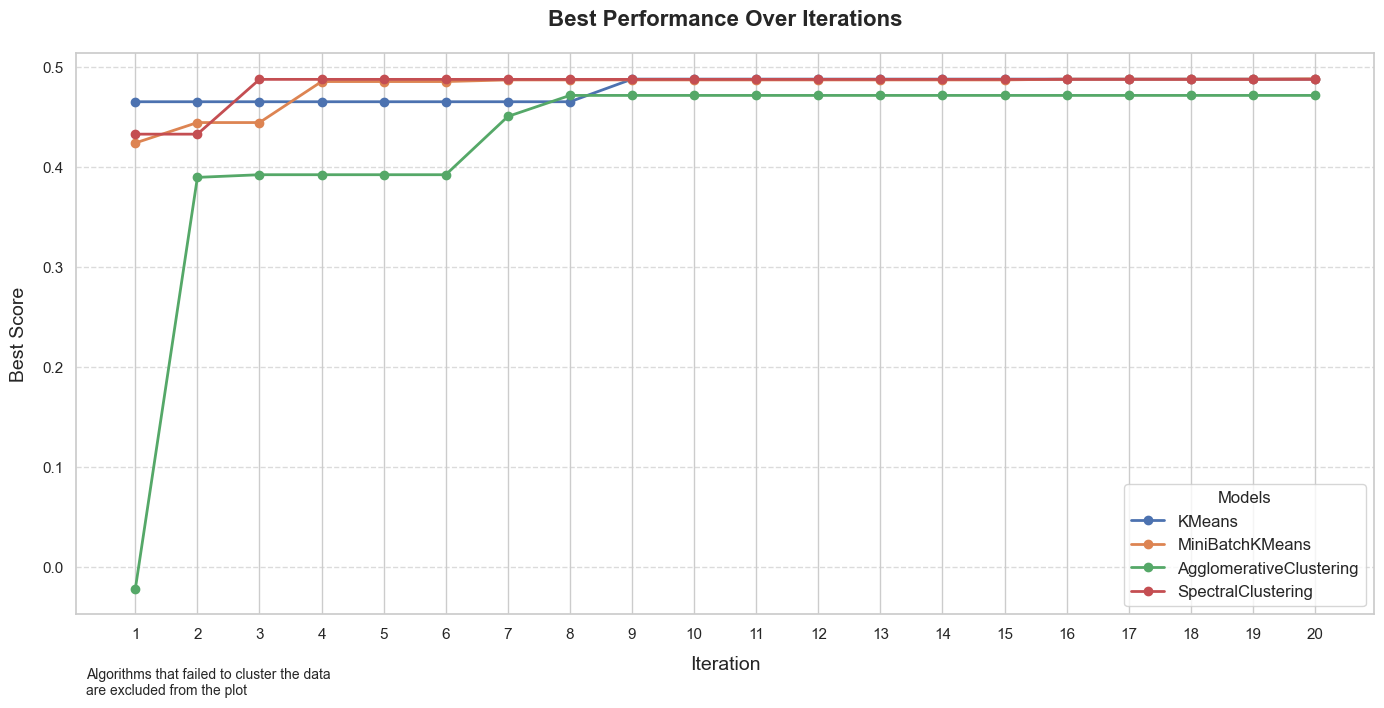

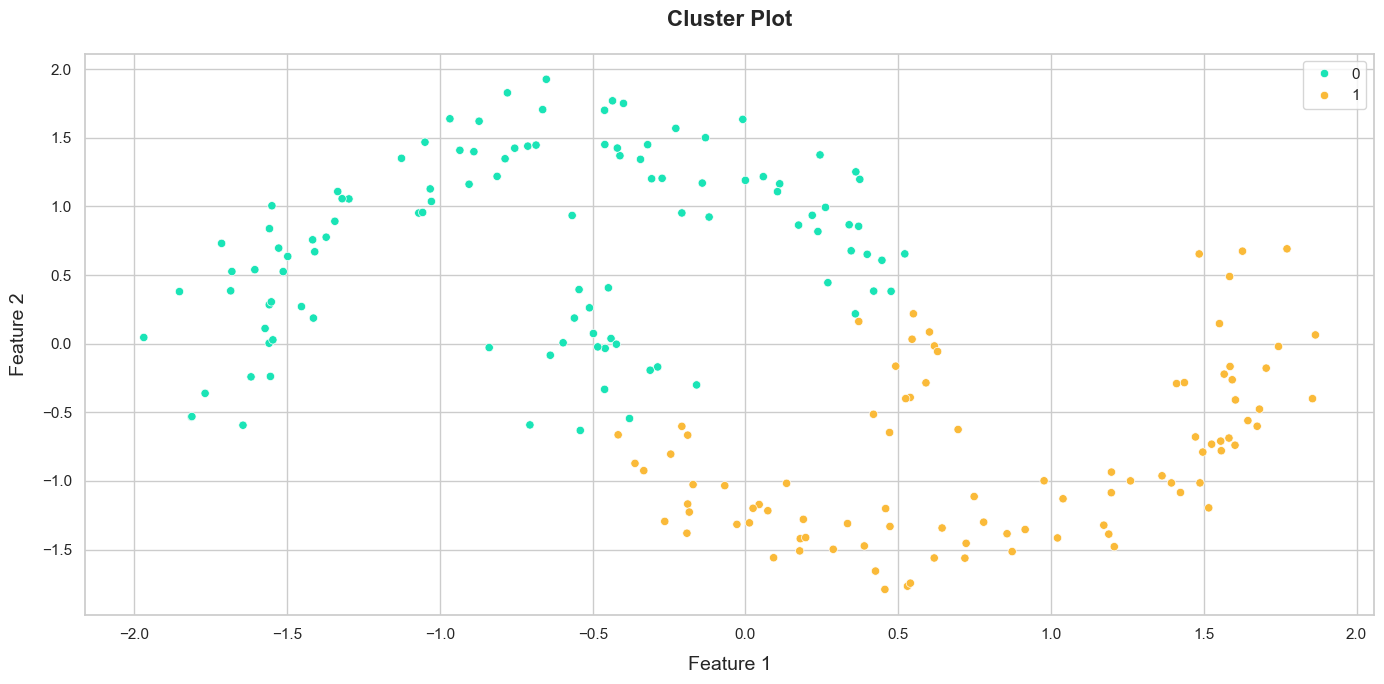

In [19]:
ac5.evaluate()